In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import locator_params

In [4]:
np.log(0.5)

-0.6931471805599453

In [3]:
def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

In [4]:
plt.rcParams['figure.figsize'] = cm2inch(16,8)
plt.rcParams.update({'font.size': 8})

In [5]:
def load_contact2 (sys, lipid):
    d1 = np.zeros([284])
    d2 = np.zeros([284])
    d3 = np.zeros([284])
    try:
        d1 = np.loadtxt('{0:s}_0_{1:s}_Ava_number_of_contact_per_resid.txt'.format(sys, lipid))
    except IOError:
        print ('{0:s}_0_{1:s}_Ava_number_of_contact_per_resid.txt'.format(sys, lipid)+' missing')
    try:
        d2 = np.loadtxt('{0:s}_1_{1:s}_Ava_number_of_contact_per_resid.txt'.format(sys, lipid))
    except IOError:
        print ('{0:s}_1_{1:s}_Ava_number_of_contact_per_resid.txt'.format(sys, lipid)+' missing')
    try:
        d3 = np.loadtxt('{0:s}_2_{1:s}_Ava_number_of_contact_per_resid.txt'.format(sys, lipid))
    except IOError:
        print ('{0:s}_2_{1:s}_Ava_number_of_contact_per_resid.txt'.format(sys, lipid)+' missing')

    d = [d1, d2,d3]
    return d

def load_contact (sys, lipid):
    d1 = np.zeros([284])
    d2 = np.zeros([284])
    d3 = np.zeros([284])
    d1 = np.loadtxt('{0:s}_0_{1:s}_Ava_number_of_contact_per_resid.txt'.format(sys, lipid))
    d2 = np.loadtxt('{0:s}_1_{1:s}_Ava_number_of_contact_per_resid.txt'.format(sys, lipid))
    d3 = np.loadtxt('{0:s}_2_{1:s}_Ava_number_of_contact_per_resid.txt'.format(sys, lipid))
    d = [d1, d2,d3]
    return d

def load_contact_total (sys, lipid):
    d1 = np.zeros([284])
    d2 = np.zeros([284])
    d3 = np.zeros([284])
    d1 = np.loadtxt('{0:s}_0_{1:s}_total_number_of_contact_per_resid.txt'.format(sys, lipid))
    d2 = np.loadtxt('{0:s}_1_{1:s}_total_number_of_contact_per_resid.txt'.format(sys, lipid))
    d3 = np.loadtxt('{0:s}_2_{1:s}_total_number_of_contact_per_resid.txt'.format(sys, lipid))
    d = [d1, d2,d3]
    return d

In [6]:
def load_contact_headgroup (sys, lipid):
    d1 = np.loadtxt('Headgroups/{0:s}_0_{1:s}_Ava_number_of_contact_per_resid.txt'.format(sys, lipid))
    d2 = np.loadtxt('Headgroups/{0:s}_1_{1:s}_Ava_number_of_contact_per_resid.txt'.format(sys, lipid))
    d3 = np.loadtxt('Headgroups/{0:s}_2_{1:s}_Ava_number_of_contact_per_resid.txt'.format(sys, lipid))
    d = [d1, d2,d3]
    return d

# LB 1-4

In [7]:
LBs = ['5XEZ_LB1','5XEZ_LB2','5XEZ_LB3','5XEZ_LB4']
num_lipid_per_type = [600,612,606,597]
lipid = ['POPS', 'POPE', 'POPA', 'POPG']
LB_titles = ['LB1','LB2','LB3','LB4']

In [8]:
LB1_POPS = load_contact(LBs[0], 'POPS')

In [9]:
ava_POPS = np.average(np.array(LB1_POPS), axis=0) 
std_POPS = np.std(np.array(LB1_POPS), axis=0) 

In [10]:
ava_POPS.shape

(284,)

In [11]:
LBs[:2]

['5XEZ_LB1', '5XEZ_LB2']

In [12]:
LBs[2:][0]

'5XEZ_LB3'

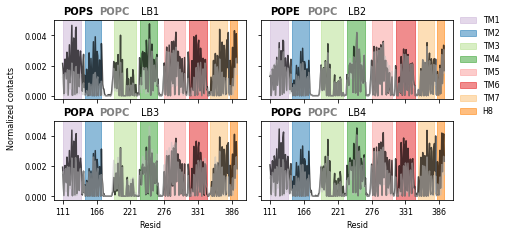

In [259]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharey=True, sharex=True)
for idx, l in enumerate(LBs[:2]):
    D = load_contact(l, lipid[idx])
    ava = np.average(np.array(D), axis=0)
    std = np.std(np.array(D), axis=0) 
    x = range(ava.shape[0])
    ax[0,idx].set_title(LB_titles[:2][idx])
    #ax[0,idx].errorbar(x, ava, yerr=std, ecolor='black')
    ax[0,idx].plot(x,ava, color=color_list[0], alpha=0.7)
for idx, l in enumerate(LBs[2:]):
    D = load_contact(l, lipid[idx+2])
    ava = np.average(np.array(D), axis=0)
    std = np.std(np.array(D), axis=0) 
    x = range(ava.shape[0])
    ax[1,idx].set_title(LB_titles[2:][idx])
    ax[1,idx].plot(x,ava, color=color_list[0], alpha=0.7)
    #ax[1,idx].errorbar(x, ava, yerr=std, ecolor='black')

ax[1,1].set_xticks([0,50,100,150,200,250,300,350])
    
plt.tight_layout(h_pad=0.5)


lipid_ref = 'POPC'
for idx, l in enumerate(LBs[:2]):
    D = load_contact(l, lipid_ref)
    ava = np.average(np.array(D), axis=0)
    std = np.std(np.array(D), axis=0) 
    x = range(ava.shape[0])
    #ax[0,idx].errorbar(x, ava, yerr=std, ecolor='black', color='red', alpha=0.5)
    ax[0,idx].plot(x,ava, color=color_list[1], alpha=0.5)
for idx, l in enumerate(LBs[2:]):
    D = load_contact(l, lipid_ref)
    ava = np.average(np.array(D), axis=0)
    std = np.std(np.array(D), axis=0) 
    x = range(ava.shape[0])
    ax[1,idx].plot(x,ava, color=color_list[1], alpha=0.5)
    #ax[1,idx].errorbar(x, ava, yerr=std, ecolor='black', color='red', alpha=0.5)

color_list =  ['black', '#bdbdbd']

ax[0,0].text(0, 0.0054, 'POPS', color=color_list[0], fontsize=10,weight='bold')
ax[0,1].text(0, 0.0054, 'POPE', color=color_list[0], fontsize=10,weight='bold')
ax[1,0].text(0, 0.0054, 'POPA', color=color_list[0], fontsize=10,weight='bold')
ax[1,1].text(0, 0.0054, 'POPG', color=color_list[0], fontsize=10,weight='bold')

ax[0,0].text(60, 0.0054, 'POPC', color='grey',fontsize=10,weight='bold')
ax[0,1].text(60, 0.0054, 'POPC', color='grey',fontsize=10,weight='bold')
ax[1,0].text(60, 0.0054, 'POPC', color='grey',fontsize=10,weight='bold')
ax[1,1].text(60, 0.0054, 'POPC', color='grey',fontsize=10,weight='bold')

xticks = np.arange(0,284, 55)
xtick_labels = np.arange(111,395, 55)

ax[1,1].set_xticks(xticks)
ax[1,1].set_xticklabels(xtick_labels)

ax[0,0].text(-90,0.0015,'Normalized contacts', rotation='vertical')
ax[1,1].set_xlabel('Resid')
ax[1,0].set_xlabel('Resid')

TM_color_list = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6']
alpha_value=0.5

#ax[0,0].set_ylim(0,0.0045)

for i in range(2):
        for j in range(2):
            ax[i,j].axvspan(0, 30, alpha=alpha_value, color=TM_color_list[8], label='TM1')
            ax[i,j].axvspan(36, 63, alpha=alpha_value, color=TM_color_list[1], label='TM2') 
            ax[i,j].axvspan(83, 119, alpha=alpha_value, color=TM_color_list[2], label='TM3')
            ax[i,j].axvspan(125, 154, alpha=alpha_value, color=TM_color_list[3], label='TM4')
            ax[i,j].axvspan(165, 198, alpha=alpha_value, color=TM_color_list[4], label='TM5')
            ax[i,j].axvspan(205, 235, alpha=alpha_value, color=TM_color_list[5], label='TM6')
            ax[i,j].axvspan(240, 267, alpha=alpha_value, color=TM_color_list[6], label='TM7')
            ax[i,j].axvspan(271, 283, alpha=alpha_value, color=TM_color_list[7], label='H8')
            
plt.savefig('LBs1-4_whole_lipid.png', dpi=300)
plt.savefig('LBs1-4_whole_lipid.svg', dpi=300)

plt.legend(loc='center left', bbox_to_anchor=(1, 1.7),fancybox=True, shadow=False, ncol=1,frameon=False)

#plt.tight_layout()
plt.savefig('LBs1-4_whole_lipid_legend.png', dpi=300, bbox_inches="tight")
plt.savefig('LBs1-4_whole_lipid_legend.svg', dpi=300, bbox_inches="tight")


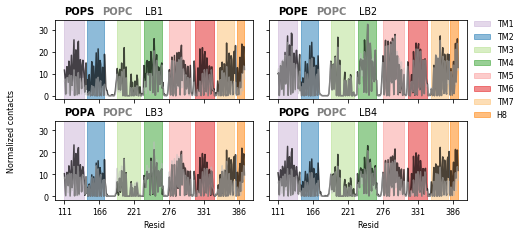

In [20]:
color_list =  ['black', '#bdbdbd']

fig, ax = plt.subplots(nrows=2, ncols=2, sharey=True, sharex=True)
for idx, l in enumerate(LBs[:2]):
    D = load_contact_total(l, lipid[idx])
    ava = np.average(np.array(D), axis=0)
    std = np.std(np.array(D), axis=0) 
    x = range(ava.shape[0])
    ax[0,idx].set_title(LB_titles[:2][idx])
    #ax[0,idx].errorbar(x, ava, yerr=std, ecolor='black')
    ax[0,idx].plot(x,ava, color=color_list[0], alpha=0.7)
for idx, l in enumerate(LBs[2:]):
    D = load_contact_total(l, lipid[idx+2])
    ava = np.average(np.array(D), axis=0)
    std = np.std(np.array(D), axis=0) 
    x = range(ava.shape[0])
    ax[1,idx].set_title(LB_titles[2:][idx])
    ax[1,idx].plot(x,ava, color=color_list[0], alpha=0.7)
    #ax[1,idx].errorbar(x, ava, yerr=std, ecolor='black')

ax[1,1].set_xticks([0,50,100,150,200,250,300,350])
    
plt.tight_layout(h_pad=0.5)


lipid_ref = 'POPC'
for idx, l in enumerate(LBs[:2]):
    D = load_contact_total(l, lipid_ref)
    ava = np.average(np.array(D), axis=0)
    std = np.std(np.array(D), axis=0) 
    x = range(ava.shape[0])
    #ax[0,idx].errorbar(x, ava, yerr=std, ecolor='black', color='red', alpha=0.5)
    ax[0,idx].plot(x,ava, color=color_list[1], alpha=0.5)
for idx, l in enumerate(LBs[2:]):
    D = load_contact_total(l, lipid_ref)
    ava = np.average(np.array(D), axis=0)
    std = np.std(np.array(D), axis=0) 
    x = range(ava.shape[0])
    ax[1,idx].plot(x,ava, color=color_list[1], alpha=0.5)
    #ax[1,idx].errorbar(x, ava, yerr=std, ecolor='black', color='red', alpha=0.5)

color_list =  ['black', '#bdbdbd']

val=37
ax[0,0].text(0, val, 'POPS', color=color_list[0], fontsize=10,weight='bold')
ax[0,1].text(0, val, 'POPE', color=color_list[0], fontsize=10,weight='bold')
ax[1,0].text(0, val, 'POPA', color=color_list[0], fontsize=10,weight='bold')
ax[1,1].text(0, val, 'POPG', color=color_list[0], fontsize=10,weight='bold')

ax[0,0].text(60, val, 'POPC', color='grey',fontsize=10,weight='bold')
ax[0,1].text(60, val, 'POPC', color='grey',fontsize=10,weight='bold')
ax[1,0].text(60, val, 'POPC', color='grey',fontsize=10,weight='bold')
ax[1,1].text(60, val, 'POPC', color='grey',fontsize=10,weight='bold')

xticks = np.arange(0,284, 55)
xtick_labels = np.arange(111,395, 55)

ax[1,1].set_xticks(xticks)
ax[1,1].set_xticklabels(xtick_labels)

ax[0,0].text(-90,0.0015,'Normalized contacts', rotation='vertical')
ax[1,1].set_xlabel('Resid')
ax[1,0].set_xlabel('Resid')

TM_color_list = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6']
alpha_value=0.5

#ax[0,0].set_ylim(0,0.0045)

for i in range(2):
        for j in range(2):
            ax[i,j].axvspan(0, 30, alpha=alpha_value, color=TM_color_list[8], label='TM1')
            ax[i,j].axvspan(36, 63, alpha=alpha_value, color=TM_color_list[1], label='TM2') 
            ax[i,j].axvspan(83, 119, alpha=alpha_value, color=TM_color_list[2], label='TM3')
            ax[i,j].axvspan(125, 154, alpha=alpha_value, color=TM_color_list[3], label='TM4')
            ax[i,j].axvspan(165, 198, alpha=alpha_value, color=TM_color_list[4], label='TM5')
            ax[i,j].axvspan(205, 235, alpha=alpha_value, color=TM_color_list[5], label='TM6')
            ax[i,j].axvspan(240, 267, alpha=alpha_value, color=TM_color_list[6], label='TM7')
            ax[i,j].axvspan(271, 283, alpha=alpha_value, color=TM_color_list[7], label='H8')
            

plt.legend(loc='center left', bbox_to_anchor=(1, 1.65),fancybox=True, shadow=False, ncol=1,frameon=False)

#plt.tight_layout()
plt.savefig('LBs1-4_whole_lipid_total_legend.png', dpi=300, bbox_inches="tight")
plt.savefig('LBs1-4_whole_lipid_total_legend.svg', dpi=300, bbox_inches="tight")


In [250]:
pwd

'/home/au447022/Documents/GCGR_Complex_LB/ANALYSIS/CONTACT_PYTHON'

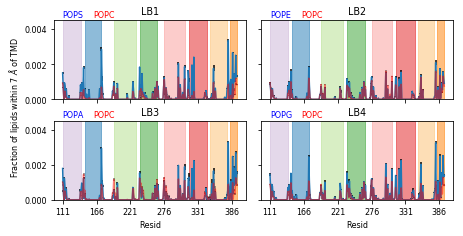

In [204]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharey=True, sharex=True)
for idx, l in enumerate(LBs[:2]):
    D = load_contact_headgroup(l, lipid[idx])
    ava = np.average(np.array(D), axis=0)
    std = np.std(np.array(D), axis=0) 
    x = range(ava.shape[0])
    ax[0,idx].set_title(LB_titles[:2][idx])
    ax[0,idx].errorbar(x, ava, yerr=std, ecolor='black')
for idx, l in enumerate(LBs[2:]):
    D = load_contact_headgroup(l, lipid[idx+2])
    ava = np.average(np.array(D), axis=0)
    std = np.std(np.array(D), axis=0) 
    x = range(ava.shape[0])
    ax[1,idx].set_title(LB_titles[2:][idx])
    ax[1,idx].errorbar(x, ava, yerr=std, ecolor='black')

ax[1,1].set_xticks([0,50,100,150,200,250,300,350])
    
plt.tight_layout(h_pad=0.5)


lipid_ref = 'POPC'
for idx, l in enumerate(LBs[:2]):
    D = load_contact_headgroup(l, lipid_ref)
    ava = np.average(np.array(D), axis=0)
    std = np.std(np.array(D), axis=0) 
    x = range(ava.shape[0])
    ax[0,idx].errorbar(x, ava, yerr=std, ecolor='black', color='red', alpha=0.5)
for idx, l in enumerate(LBs[2:]):
    D = load_contact_headgroup(l, lipid_ref)
    ava = np.average(np.array(D), axis=0)
    std = np.std(np.array(D), axis=0) 
    x = range(ava.shape[0])
    ax[1,idx].errorbar(x, ava, yerr=std, ecolor='black', color='red', alpha=0.5)
    

ax[0,0].text(0, 0.0047, 'POPS', color='blue')
ax[0,1].text(0, 0.0047, 'POPE', color='blue')
ax[1,0].text(0, 0.0047, 'POPA', color='blue')
ax[1,1].text(0, 0.0047, 'POPG', color='blue')

ax[0,0].text(50, 0.0047, 'POPC', color='red')
ax[0,1].text(50, 0.0047, 'POPC', color='red')
ax[1,0].text(50, 0.0047, 'POPC', color='red')
ax[1,1].text(50, 0.0047, 'POPC', color='red')

xticks = np.arange(0,284, 55)
xtick_labels = np.arange(111,395, 55)

ax[1,1].set_xticks(xticks)
ax[1,1].set_xticklabels(xtick_labels)

ax[0,0].text(-90,0.003,'Fraction of lipids within 7 $Å$ of TMD', rotation='vertical')
ax[1,1].set_xlabel('Resid')
ax[1,0].set_xlabel('Resid')

TM_color_list = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6']
alpha_value=0.5

ax[0,0].set_ylim(0,0.0045)

for i in range(2):
        for j in range(2):
            ax[i,j].axvspan(0, 30, alpha=alpha_value, color=TM_color_list[8], label='TM1')
            ax[i,j].axvspan(36, 63, alpha=alpha_value, color=TM_color_list[1], label='TM2') 
            ax[i,j].axvspan(83, 119, alpha=alpha_value, color=TM_color_list[2], label='TM3')
            ax[i,j].axvspan(125, 154, alpha=alpha_value, color=TM_color_list[3], label='TM4')
            ax[i,j].axvspan(165, 198, alpha=alpha_value, color=TM_color_list[4], label='TM5')
            ax[i,j].axvspan(205, 235, alpha=alpha_value, color=TM_color_list[5], label='TM6')
            ax[i,j].axvspan(240, 267, alpha=alpha_value, color=TM_color_list[6], label='TM7')
            ax[i,j].axvspan(271, 283, alpha=alpha_value, color=TM_color_list[7], label='H8')

plt.savefig('LBs1-4_headgroup_lipid.png', dpi=300)
plt.savefig('LBs1-4_headgroup_lipid.svg', dpi=300)

# More complex

In [21]:
LBs = ['5XEZ_LB_semi-complex2','5YQZ_LB_semi-complex2']
lipids = ['POPC', 'POPS', 'POPE', 'POPA', 'POPG','POP2', 'CHOL']
LB_titles = ['IA Complex 2', 'PA Complex 2']

In [22]:
lipids[3:]

['POPA', 'POPG', 'POP2', 'CHOL']

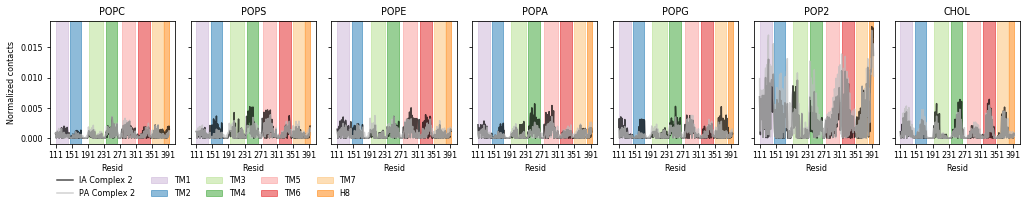

In [160]:
fig, ax = plt.subplots(nrows=1, ncols=7, sharey=True, sharex=True, figsize=cm2inch(36,6))

color_list =  ['black', '#bdbdbd']
ecolor_list = ['red','orange']

for l_idx, lipid in enumerate(lipids):
    for idx, s in enumerate(LBs):
        D = load_contact(s, lipids[l_idx])
        ava = np.average(np.array(D), axis=0)
        std = np.std(np.array(D), axis=0) 
        x = range(ava.shape[0])
        ax[l_idx].set_title('{0:s}'.format(lipid))
        ax[l_idx].plot(x, ava, color=color_list[idx], label=LB_titles[idx], alpha=0.7)
        #ax[l_idx].fill_between(x, ava-std, ava+std, alpha=0.2, edgecolor=color_list[idx], facecolor=color_list[idx])
        
        #ax[l_idx].errorbar(x, ava, yerr=std, ecolor=ecolor_list[idx], color=color_list[idx], label='{0:s}'.format(LB_titles[idx]), alpha=0.7)

        
plt.tight_layout(h_pad=0.5)

alpha_value=0.5
TM_color_list = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6']


for i in range(7):
            ax[i].axvspan(0, 30, alpha=alpha_value, color=TM_color_list[8], label='TM1')
            ax[i].axvspan(36, 63, alpha=alpha_value, color=TM_color_list[1], label='TM2') 
            ax[i].axvspan(83, 119, alpha=alpha_value, color=TM_color_list[2], label='TM3')
            ax[i].axvspan(125, 154, alpha=alpha_value, color=TM_color_list[3], label='TM4')
            ax[i].axvspan(165, 198, alpha=alpha_value, color=TM_color_list[4], label='TM5')
            ax[i].axvspan(205, 235, alpha=alpha_value, color=TM_color_list[5], label='TM6')
            ax[i].axvspan(240, 267, alpha=alpha_value, color=TM_color_list[6], label='TM7')
            ax[i].axvspan(271, 283, alpha=alpha_value, color=TM_color_list[7], label='H8')
            ax[i].set_xlabel('Resid')

#plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5),fancybox=True, shadow=False, ncol=4,frameon=False)

ax[0].legend(loc='upper center', bbox_to_anchor=(1.25, -0.2),
          fancybox=True, shadow=True, ncol=5, frameon=False)
ax[0].set_ylabel('Normalized contacts')
#x_ticks =[ i for i in range(26,310)] 
x_ticks = np.arange(0,284, 40)
x_ticklabels = np.arange(111,395,40)

for i in range(6):
    ax[i].set_xticks(x_ticks)
    ax[i].set_xticklabels(x_ticklabels)
    
plt.savefig('Contact_plots_complex_python_2.png', dpi=300, bbox_inches="tight")
plt.savefig('Contact_plots_complex_python_2.svg', dpi=300, bbox_inches="tight")

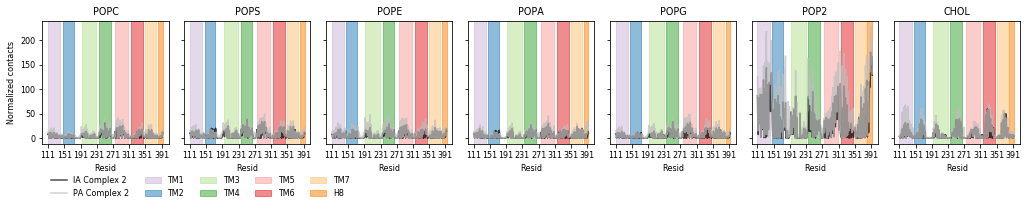

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=7, sharey=True, sharex=True, figsize=cm2inch(36,6))

color_list =  ['black', '#bdbdbd']
ecolor_list = ['red','orange']

for l_idx, lipid in enumerate(lipids):
    for idx, s in enumerate(LBs):
        D = load_contact_total(s, lipids[l_idx])
        ava = np.average(np.array(D), axis=0)
        std = np.std(np.array(D), axis=0) 
        x = range(ava.shape[0])
        ax[l_idx].set_title('{0:s}'.format(lipid))
        ax[l_idx].plot(x, ava, color=color_list[idx], label=LB_titles[idx], alpha=0.7)
        #ax[l_idx].fill_between(x, ava-std, ava+std, alpha=0.2, edgecolor=color_list[idx], facecolor=color_list[idx])
        
        #ax[l_idx].errorbar(x, ava, yerr=std, ecolor=ecolor_list[idx], color=color_list[idx], label='{0:s}'.format(LB_titles[idx]), alpha=0.7)

        
plt.tight_layout(h_pad=0.5)

alpha_value=0.5
TM_color_list = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6']


for i in range(7):
            ax[i].axvspan(0, 30, alpha=alpha_value, color=TM_color_list[8], label='TM1')
            ax[i].axvspan(36, 63, alpha=alpha_value, color=TM_color_list[1], label='TM2') 
            ax[i].axvspan(83, 119, alpha=alpha_value, color=TM_color_list[2], label='TM3')
            ax[i].axvspan(125, 154, alpha=alpha_value, color=TM_color_list[3], label='TM4')
            ax[i].axvspan(165, 198, alpha=alpha_value, color=TM_color_list[4], label='TM5')
            ax[i].axvspan(205, 235, alpha=alpha_value, color=TM_color_list[5], label='TM6')
            ax[i].axvspan(240, 267, alpha=alpha_value, color=TM_color_list[6], label='TM7')
            ax[i].axvspan(271, 283, alpha=alpha_value, color=TM_color_list[7], label='H8')
            ax[i].set_xlabel('Resid')

#plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5),fancybox=True, shadow=False, ncol=4,frameon=False)

ax[0].legend(loc='upper center', bbox_to_anchor=(1.25, -0.2),
          fancybox=True, shadow=True, ncol=5, frameon=False)
ax[0].set_ylabel('Normalized contacts')
#x_ticks =[ i for i in range(26,310)] 
x_ticks = np.arange(0,284, 40)
x_ticklabels = np.arange(111,395,40)

for i in range(6):
    ax[i].set_xticks(x_ticks)
    ax[i].set_xticklabels(x_ticklabels)
    
plt.savefig('Contact_total_plots_complex_python_2.png', dpi=300, bbox_inches="tight")
plt.savefig('Contact_total_plots_complex_python_2.svg', dpi=300, bbox_inches="tight")

In [156]:
x = np.arange(111,395,50)
np.append(x, 400)

array([111, 161, 211, 261, 311, 361, 400])

In [24]:
LBs = ['5XEZ_LB_semi-complex','5YQZ_LB_semi-complex']
lipids = ['POPC', 'POPS', 'POPE', 'POPA', 'POPG']
LB_titles = ['IA Complex 1', 'PA Complex 1']

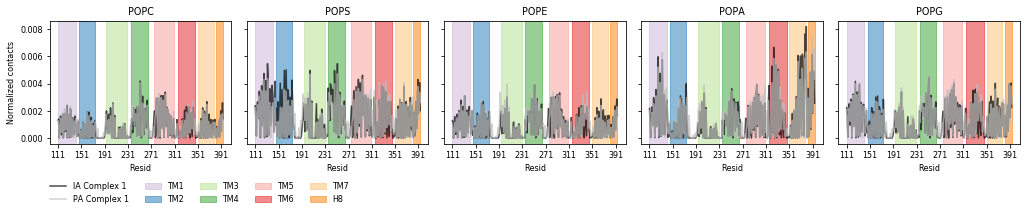

In [189]:
fig, ax = plt.subplots(nrows=1, ncols=5, sharey=True, sharex=True, figsize=cm2inch(36,6))

color_list =  ['black', '#bdbdbd']
ecolor_list = ['red','orange']

for l_idx, lipid in enumerate(lipids):
    for idx, s in enumerate(LBs):
        D = load_contact(s, lipids[l_idx])
        ava = np.average(np.array(D), axis=0)
        std = np.std(np.array(D), axis=0) 
        x = range(ava.shape[0])
        ax[l_idx].set_title('{0:s}'.format(lipid))
        ax[l_idx].plot(x, ava, color=color_list[idx], label=LB_titles[idx], alpha=0.7)
        #ax[l_idx].fill_between(x, ava-std, ava+std, alpha=0.2, edgecolor=color_list[idx], facecolor=color_list[idx])
        
        #ax[l_idx].errorbar(x, ava, yerr=std, ecolor=ecolor_list[idx], color=color_list[idx], label='{0:s}'.format(LB_titles[idx]), alpha=0.7)

        
plt.tight_layout(h_pad=0.5)

alpha_value=0.5
TM_color_list = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6']


for i in range(5):
            ax[i].axvspan(0, 30, alpha=alpha_value, color=TM_color_list[8], label='TM1')
            ax[i].axvspan(36, 63, alpha=alpha_value, color=TM_color_list[1], label='TM2') 
            ax[i].axvspan(83, 119, alpha=alpha_value, color=TM_color_list[2], label='TM3')
            ax[i].axvspan(125, 154, alpha=alpha_value, color=TM_color_list[3], label='TM4')
            ax[i].axvspan(165, 198, alpha=alpha_value, color=TM_color_list[4], label='TM5')
            ax[i].axvspan(205, 235, alpha=alpha_value, color=TM_color_list[5], label='TM6')
            ax[i].axvspan(240, 267, alpha=alpha_value, color=TM_color_list[6], label='TM7')
            ax[i].axvspan(271, 283, alpha=alpha_value, color=TM_color_list[7], label='H8')
            ax[i].set_xlabel('Resid')

#plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5),fancybox=True, shadow=False, ncol=4,frameon=False)

ax[0].legend(loc='upper center', bbox_to_anchor=(0.825, -0.25),
          fancybox=True, shadow=True, ncol=5, frameon=False)
ax[0].set_ylabel('Normalized contacts')
#x_ticks =[ i for i in range(26,310)] 
x_ticks = np.arange(0,284, 40)
x_ticklabels = np.arange(111,395,40)

for i in range(5):
    ax[i].set_xticks(x_ticks)
    ax[i].set_xticklabels(x_ticklabels)
    
plt.savefig('Contact_plots_complex_python_1.png', dpi=300, bbox_inches="tight")
plt.savefig('Contact_plots_complex_python_1.svg', dpi=300, bbox_inches="tight")

In [190]:
pwd

'/home/au447022/Documents/GCGR_Complex_LB/ANALYSIS/CONTACT_PYTHON'

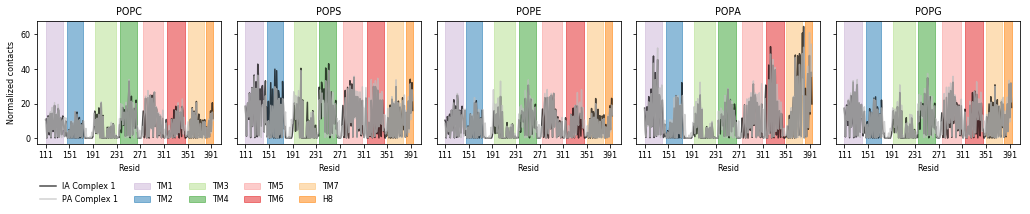

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=5, sharey=True, sharex=True, figsize=cm2inch(36,6))

color_list =  ['black', '#bdbdbd']
ecolor_list = ['red','orange']

for l_idx, lipid in enumerate(lipids):
    for idx, s in enumerate(LBs):
        D = load_contact_total(s, lipids[l_idx])
        ava = np.average(np.array(D), axis=0)
        std = np.std(np.array(D), axis=0) 
        x = range(ava.shape[0])
        ax[l_idx].set_title('{0:s}'.format(lipid))
        ax[l_idx].plot(x, ava, color=color_list[idx], label=LB_titles[idx], alpha=0.7)
        #ax[l_idx].fill_between(x, ava-std, ava+std, alpha=0.2, edgecolor=color_list[idx], facecolor=color_list[idx])
        
        #ax[l_idx].errorbar(x, ava, yerr=std, ecolor=ecolor_list[idx], color=color_list[idx], label='{0:s}'.format(LB_titles[idx]), alpha=0.7)

        
plt.tight_layout(h_pad=0.5)

alpha_value=0.5
TM_color_list = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6']


for i in range(5):
            ax[i].axvspan(0, 30, alpha=alpha_value, color=TM_color_list[8], label='TM1')
            ax[i].axvspan(36, 63, alpha=alpha_value, color=TM_color_list[1], label='TM2') 
            ax[i].axvspan(83, 119, alpha=alpha_value, color=TM_color_list[2], label='TM3')
            ax[i].axvspan(125, 154, alpha=alpha_value, color=TM_color_list[3], label='TM4')
            ax[i].axvspan(165, 198, alpha=alpha_value, color=TM_color_list[4], label='TM5')
            ax[i].axvspan(205, 235, alpha=alpha_value, color=TM_color_list[5], label='TM6')
            ax[i].axvspan(240, 267, alpha=alpha_value, color=TM_color_list[6], label='TM7')
            ax[i].axvspan(271, 283, alpha=alpha_value, color=TM_color_list[7], label='H8')
            ax[i].set_xlabel('Resid')

#plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5),fancybox=True, shadow=False, ncol=4,frameon=False)

ax[0].legend(loc='upper center', bbox_to_anchor=(0.825, -0.25),
          fancybox=True, shadow=True, ncol=5, frameon=False)
ax[0].set_ylabel('Normalized contacts')
#x_ticks =[ i for i in range(26,310)] 
x_ticks = np.arange(0,284, 40)
x_ticklabels = np.arange(111,395,40)

for i in range(5):
    ax[i].set_xticks(x_ticks)
    ax[i].set_xticklabels(x_ticklabels)
    
plt.savefig('Contact_total_plots_complex_python_1.png', dpi=300, bbox_inches="tight")
plt.savefig('Contact_total_plots_complex_python_1.svg', dpi=300, bbox_inches="tight")